In [1]:
import numpy as np 
from src.models.Descriptive import NRM 
from src.utils.plot import plot_spike

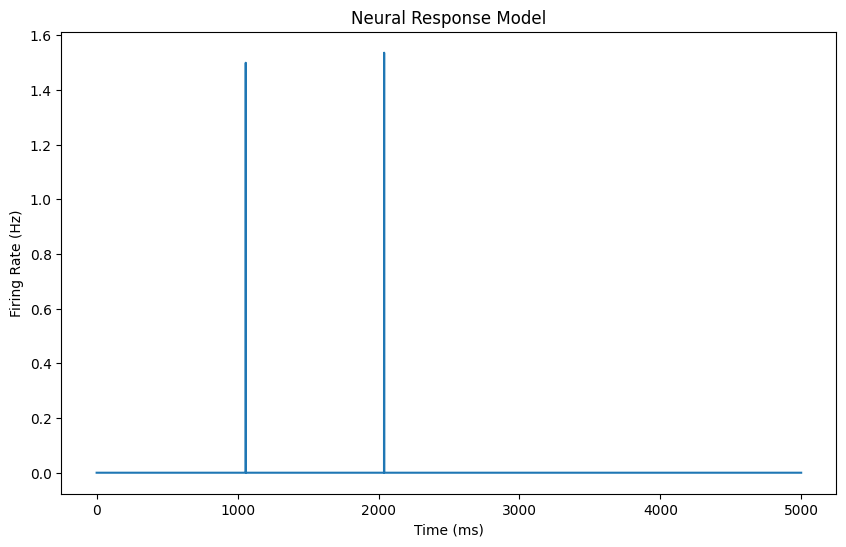

In [2]:
duration = 5 
hz = 1000
epochs = duration * hz 
input_stimulus = np.random.randn(epochs)
dt = 1/hz
kernel = np.array([0.1, 0.3, 0.6, 0.3, 0.1])
firing_rates = NRM.LNP(kernel,input_stimulus,None,dt).simulate()
plot_spike(np.arange(epochs),firing_rates,title="Neural Response Model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [6]:
time_constant = 10.0  
external_input = np.sin(np.linspace(0,2*np.pi,100))
dt = 0.01  
num_steps = 100 

In [7]:
model = NRM.ReLUModel(time_constant, dt)
model.simulate(external_input)
firing_rate = model.get_firing_rate()

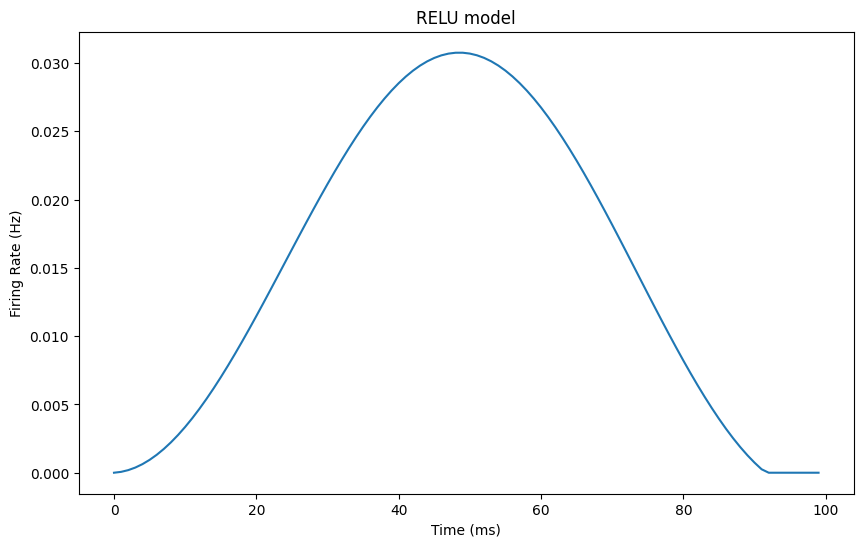

In [8]:
plot_spike(np.arange(num_steps),firing_rate,title="RELU model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [17]:
from src.models.Descriptive import PRM 
firing_rate = 5
stimulus_intensity = 10
response_gain = 20

time_steps = 100
dt = 0.01

model = PRM.FRM(firing_rate, stimulus_intensity, response_gain)

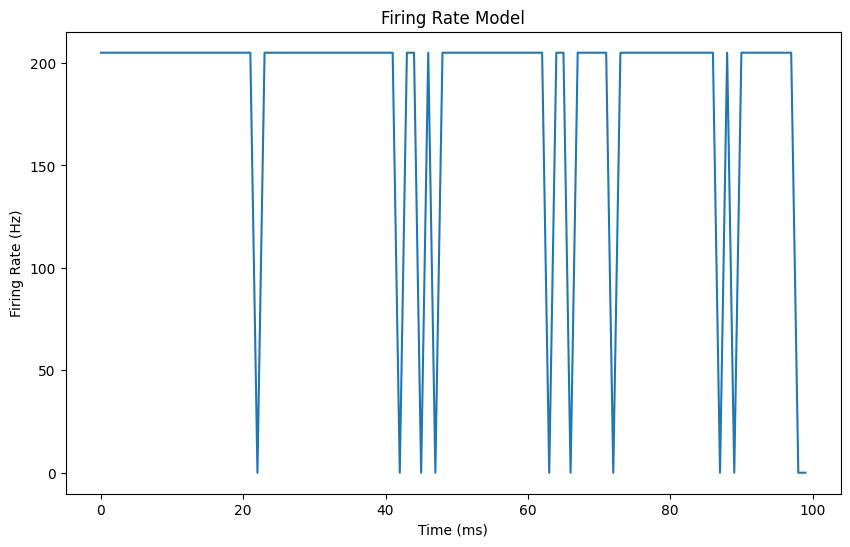

In [18]:
firing_rates = model.simulate(time_steps, dt)

plot_spike(np.arange(time_steps),firing_rates,title="Firing Rate Model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [18]:
from src.models.Descriptive import PRM 
from src.utils.plot import plot_spike
import numpy as np
data_points = [2.5, 3.0, 3.2, 2.8, 3.5]

time_steps = 1000
dt = 0.001

model = PRM.GPM()
model.fit(data_points)

In [19]:
def update(frame):
    time = frame / 10.0 
    population_activity = model.simulate(time_steps, dt)
    line.set_data(time,population_activity)

    ax.relim()
    ax.autoscale_view()

In [20]:
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation


fig,ax = plt.subplots()
ax.set_xlim(0,1000)
ax.set_ylim(0,1.6)
line, = ax.plot([],[],lw=2)
ani = FuncAnimation(fig,update,frames = np.arange(0,100),blit=False,interval=100)

In [21]:
population_act = model.simulate(time_steps, dt)
plot_spike(np.arange(time_steps),population_act,title="Gaussian Population Model",xlabel="Time (ms)",ylabel="Population Activity")